
# <span style="color:rgb(213,80,0)">Controlador PID motor DC (Inciso 6, Caso de estudio 2|TP1)</span>

In [1]:
clc; clear;

## Inicializacion de variables para simulacion

In [2]:
t_paso=1e-5; tf=2; theta_refv=1; %referencia 1 radian del enunciado
ii=0; k=3; X=[0;0;0]; u=0; Tap=0;
TL_max=0.0011; %Dato del excel, item 5
P=round(tf/t_paso);%Paso, da la cantidad de elementos necesarios para
%armar los vectores de las variables en funcion de los parametros elegidos
%Inicializacion de variables
X1=zeros(P,1);%Vector Corriente
X2=zeros(P,1);%V. Posicion
X3=zeros(P,1);%Vector Velocidad angular
error=zeros(P+2,1);
accion=zeros(P,1);
TL=zeros(P,1);
theta_ref=zeros(P,1);

## Valores obtenidos de la identificacion

In [3]:
La=4.990001e-04; Ra=1.997577e+01; Jm=2.513807e-09;
Km=6.052994e-02; Ki=9.970607e-03; Bm=0;

## Constantes empiricas del PID (empezamos con las recomendadas)

In [4]:
%KP=01; KI=0.01; KD=5; %Recomendadas
KP=10; KI=150; KD=0.00001;
Ts=t_paso;%Cambio a tiempo de muestreo

%Coeficientes del PID discreto
A=((2*KP*Ts)+(KI*Ts^2)+(2*KD))/(2*Ts);
B=((-2*KP*Ts)+(KI*Ts^2)-(4*KD))/(2*Ts);
C=KD/Ts;

## Aplicacion del PID

In [5]:
for t=1:P
    %Aplicacion del torque maximo para un t>=0.7s
    t_act=(t-1)*t_paso;
    if (t_act>=0.7)
        Tap=TL_max;
    else
        Tap=0;
    end
    X=modmotor(t_paso, X, [u;Tap]);%Invocacion de la funcion de modelado del motor
    %que devuelve las variables de estado usando Euler, se envian tres
    %parametros el t. de paso, las variables "anteriores" y accion de control
    %junto con perturbacion
    error(k)= theta_refv-X(2);%Actualizacion de la señal de error
    u=u+A*error(k)+B*error(k-1)+C*error(k-2);%Actualizacion de la accion de
    %control del PID
    X1(t)=X(1);%Corriente
    X2(t)=X(2);%Posicion angular
    X3(t)=X(3);%Velocidad angular
    accion(t)=u;%Accion de control
    TL(t)=Tap;%Perturbacion, torque aplciado
    theta_ref(t)=theta_refv;%Referencia
    k=k+1;%actualiza la muestra del PID
end
tiempo=linspace(0,tf,P);%Base de tiempos para plot

## Graficas para observar el funcionamiento del PID

In [6]:
subplot(5, 1, 1);


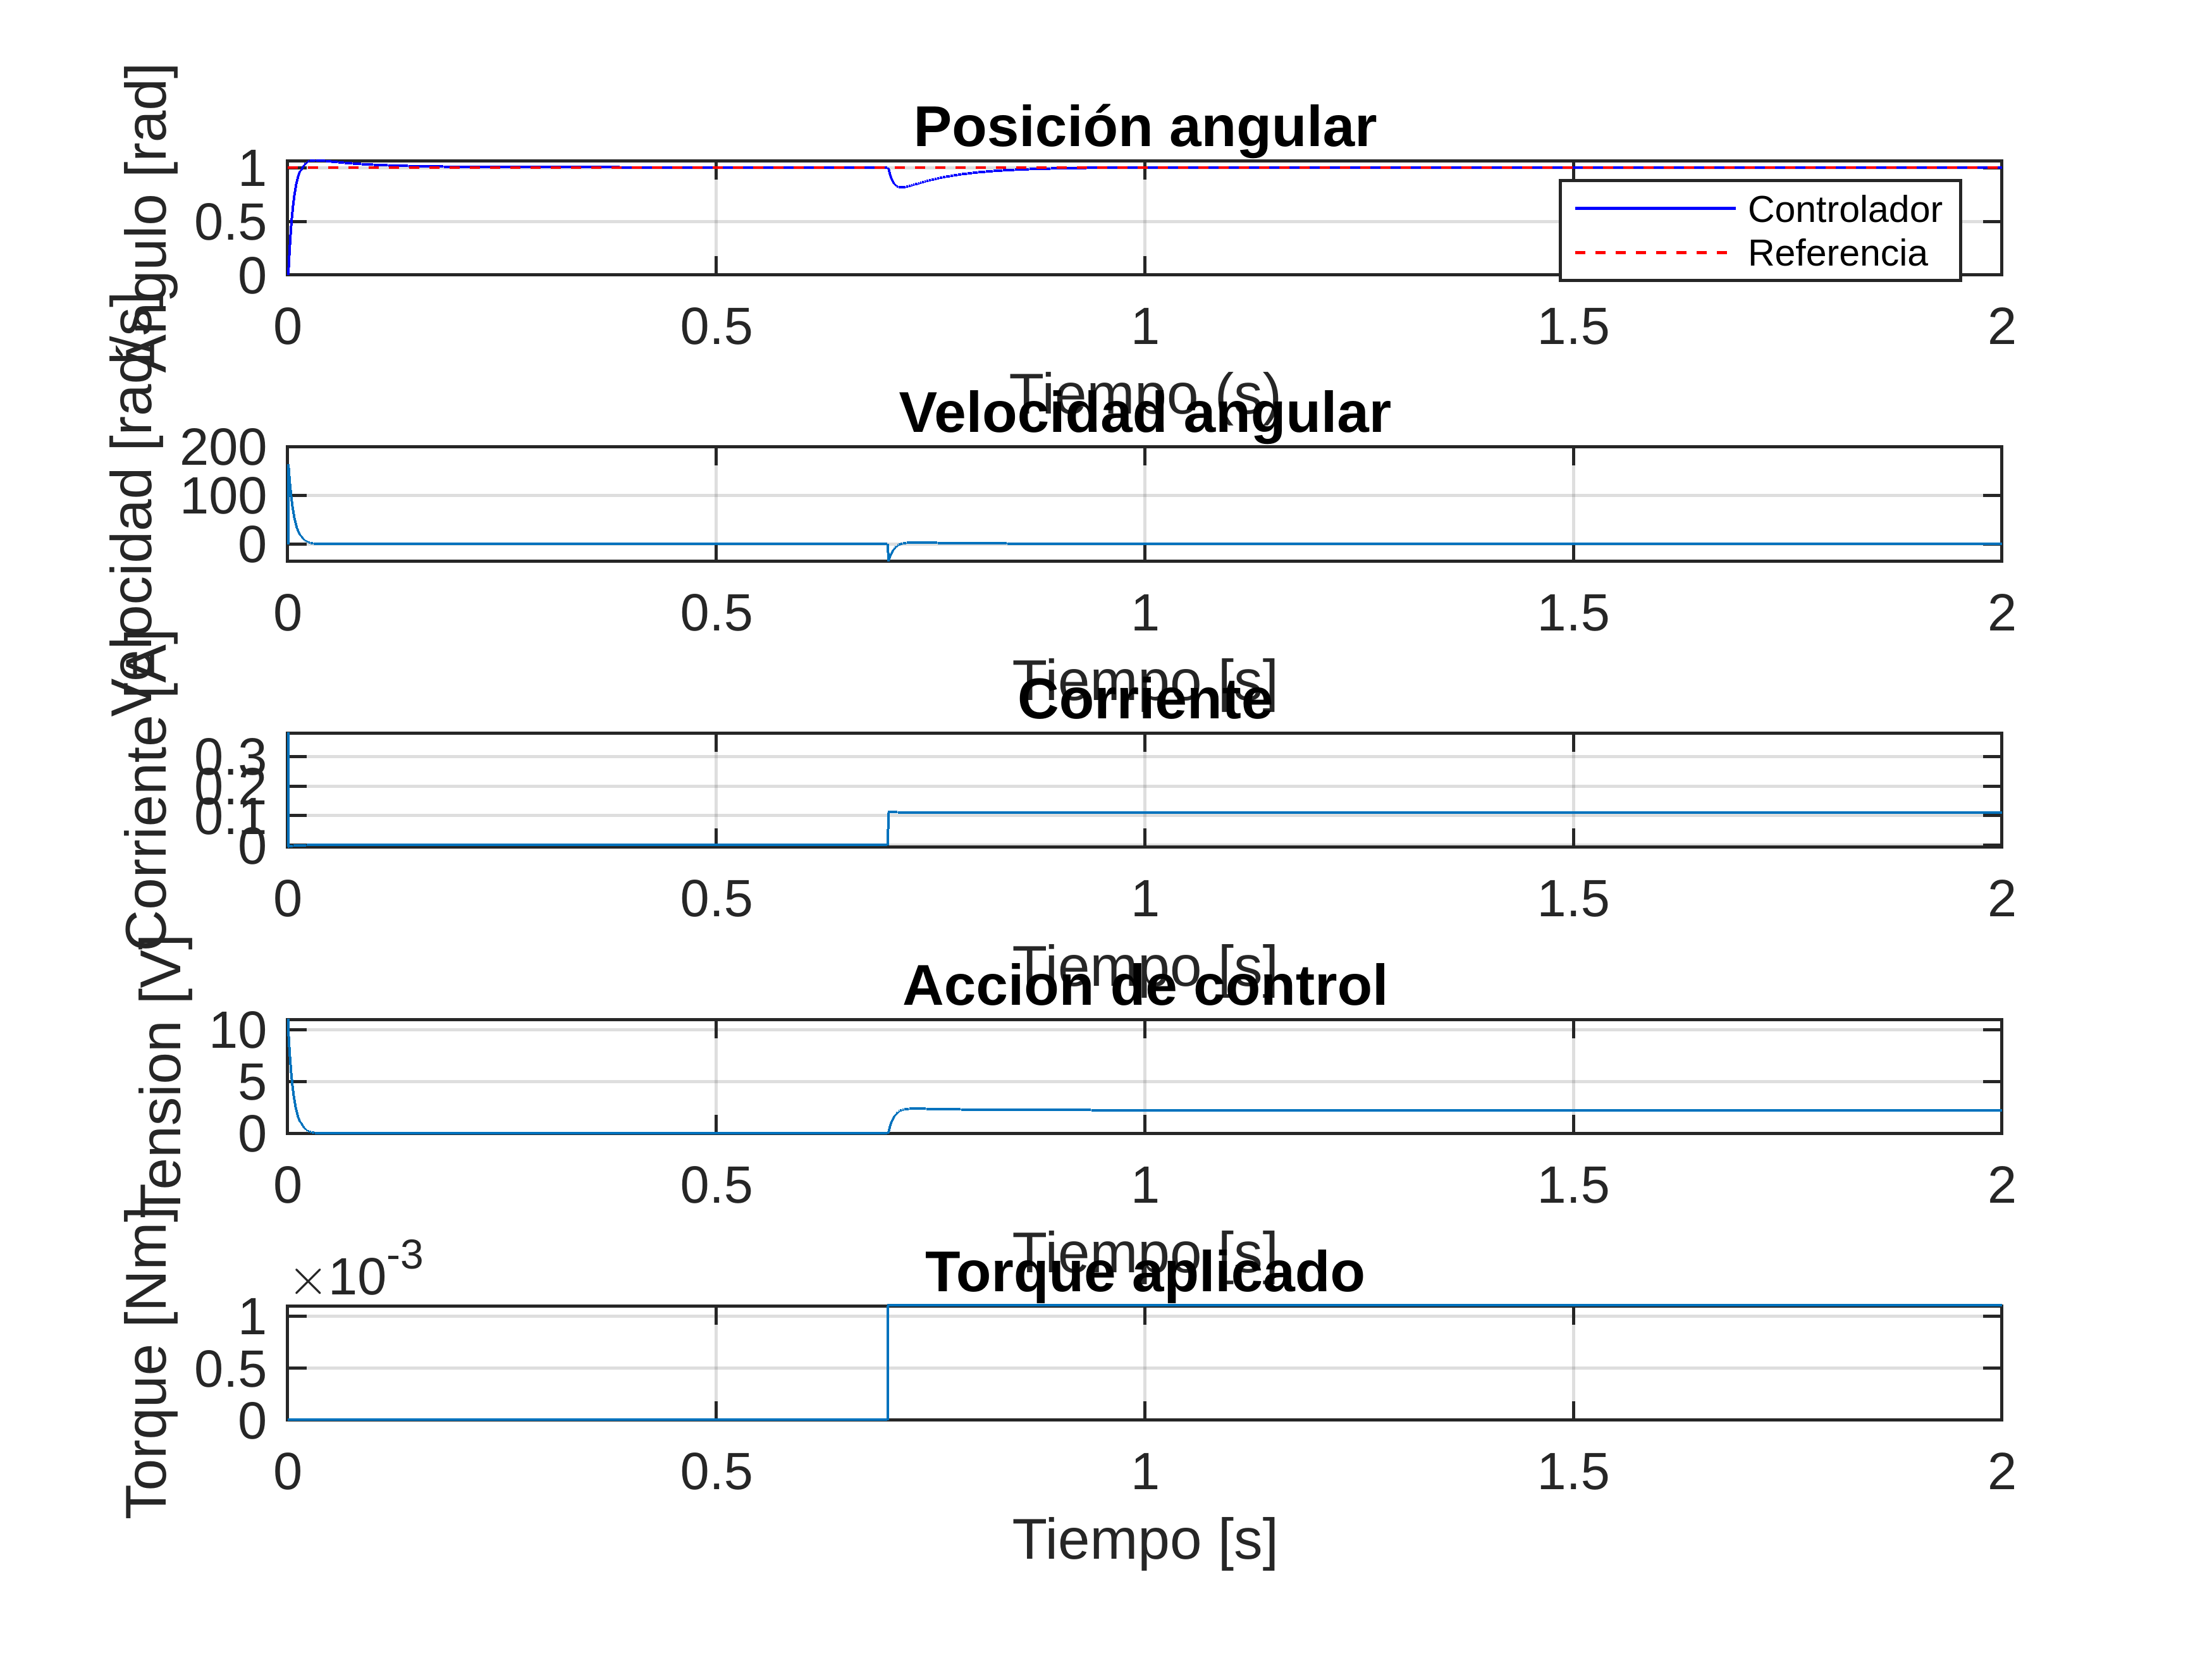

In [7]:
plot(tiempo, X2, 'b', tiempo, theta_ref, 'r--');
legend('Controlador', 'Referencia');
title('Posición angular');
xlabel('Tiempo (s)');
ylabel('Ángulo [rad]');
grid on;

subplot(5, 1, 2);
plot(tiempo, X3);
title('Velocidad angular');
xlabel('Tiempo [s]');
ylabel('Velocidad [rad/s]');
grid on;

subplot(5, 1, 3);
plot(tiempo, X1);
title('Corriente');
xlabel('Tiempo [s]');
ylabel('Corriente [A]');
grid on;

subplot(5, 1, 4);
plot(tiempo, accion);
title('Accion de control');
xlabel('Tiempo [s]');
ylabel('Tension [V]');
grid on;

subplot(5, 1, 5);
plot(tiempo, TL);
title('Torque aplicado');
xlabel('Tiempo [s]');
ylabel('Torque [Nm]');
grid on;